# Personal Data Protection

In today's world, personal data is extremely valuable information. Based on such data, for example, you can
build prediction models and use them for business development, on the other hand, all kinds of fraudsters may use personal data, so there is a clear need to protect it.
The realities of our time have led to the fact that the protection of personal data in many countries of the world is provided for by law, for this reason, companies that collect and store personal data of clients are obliged to protect them.


In the course of this project, we will have to choose a data transformation method so that, on the one hand, it would be difficult to recover personal information from them, and on the other hand, so that this transformation would not affect the quality of the model.

We will work with the data of an insurance company, stored in the following csv file: /datasets/insurance.csv, which contains the following columns:

 * Features: gender, age and salary of the insured, the number of members of his family.

 * Target feature: the number of insurance payments to the client over the past 5 years.



**The purpose of this study** is to transform the data in such a way that it would be difficult to restore the original personal information about the clients from it, on the one hand, and on the other hand, not degrade the quality of the prediction model as a result of the transformation. The model that we will build on the original and transformed data is a linear regression, to assess the quality of which we will calculate **R2, i. e. the coefficient of determination**.

**Research progress**:

We will try to find the best way to transform the data, implement it, and then evaluate the quality of 2 linear regression models trained on the original and transformed data, respectively.


Thus, this project will include the following steps:
* data overview
* selection and implementation of the transformation algorithm
* algorithm check


## Data Overview and Base Preprocessing



In [1]:
import numpy as np  # importing numpy
import pandas as pd  # importing pandas
import os.path as path # importingos.path for path handling
from sklearn.linear_model import LinearRegression # importing linear regression
import warnings # importing warnings 
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler  # importing StandardScaler to standartize quantitative features
import seaborn as sns # importing seaborn for plotting
from numpy.random import RandomState # importing RandomState class

Let's get the first idea on the data. To view and analize, we will read the file in csv format, save it to a variable, and also have a look at the first 10 rows.

In [2]:
# reading csv file and saving to df_train
try:
    base_path = 'insurance.csv' 
    df = pd.read_csv(base_path) if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}') # checking path
    display(df.head(10))  # visualizing first 10 rows
except:
     print('File not found') # if no path is correct, an error message will be printed


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Let's get the general information on the dataframe:

In [3]:
df.info() # getting general information on the df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


So, from the first glance at the dataframe, we can conclude that it is relatively small in terms of  size (only 5000 objects) and contains a small number of features - 5, the last of which is the target. All characteristics, except for gender, which, nevertheless, is already expressed through numbers, are quantitative, the data corresponds to the expected type for all characteristics, except for age and salary: it is logical to use integers to indicate age. As for the salary, in this particular case, the values are rounded to integers, therefore, the most appropriate data type for this feature is integer.
At first glance, it is clear that there are no missing values in the dataset.



To begin with, for the convenience of further manipulations, we will rename the columns in the dataframe:



In [4]:
df.rename(columns={'Пол': 'gender', 'Возраст': 'age', 'Зарплата': 'salary', 
                   'Члены семьи': 'family_members', 'Страховые выплаты': 'payout'}, inplace=True) # renaming the columns
df.head() # checking the result

,gender,age,salary,family_members,payout
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Let's move to data type change for several features:

In [5]:
df[['age', 'salary']] = df[['age', 'salary']].astype('int') # changing the data type to int
df.head() # проверяем результат

,gender,age,salary,family_members,payout
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


Далее проверим, есть ли в датасетах полные дубликаты:

In [6]:
df.duplicated().sum() # проверяем датасет на наличие полных дубликатов

153

So, full duplicates are present and make up approx. 3% of the number of objects in the dataframe. Since there are few features, we are not 100% sure that these are not coincidences. On the other hand, the number of objects is also small relative to the number of complete matches to the data. We will clear the dataframe from full duplicates:

In [7]:
df.drop_duplicates(inplace=True) # dropping full duplicates
len(df) # checking the result

4847

Next, let's check the unique values that some features take. We will not carry out such a check only on salary, since this is a pronounced quantitative feature, therefore, there can be many unique values, and this is not a contradiction.


In [8]:
for col in ['gender', 'age', 'family_members', 'payout']: # iterating over the features
    print(col, df[col].unique()) # printing unique values for each feature

gender [1 0]
age [41 46 29 21 28 43 39 25 36 32 38 23 40 34 26 42 27 33 47 30 19 31 22 20
 24 18 37 48 45 44 52 49 35 56 65 55 57 54 50 53 51 58 59 60 61 62]
family_members [1 0 2 4 3 5 6]
payout [0 1 2 3 5 4]


So, as far as the features are concerned, unique values do not raise questions, there are no anomalies. The target feature is the most interesting one from this point of view. From the task, we know that this is the number of insurance payouts to the client over the past 5 years, thus, the insurance company has never paid some client, and 5 times to someone (5 is the maximum number of payouts).



Further, in order to exclude possible multicollinearity, we will study the correlation in the quantitative features of the data. To do this, we will try to represent our dataset graphically and analyze if there is a correlation, and what is its strength between the individual df features:


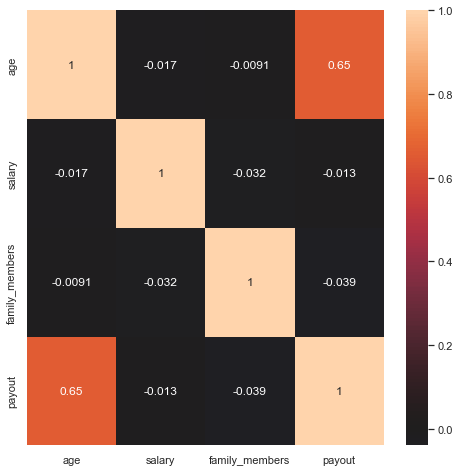

In [9]:
sns.set(rc = {'figure.figsize':(8,8)}); # setting the plot size
sns.heatmap(df.drop(columns=['gender']).corr(), center=0, annot=True); # plotting  heatmap to evaluate correlation


The only fairly strong correlation is observed between age and the target attribute: in 65% of cases, the older the client is, the more payouts he/she received  from the insurance company.

Next, we will divide the dataframe into two: features and target.


In [10]:
target = df['payout'] # separating the target feature in a different dataframe
target.head() # checking the result

0    0
1    1
2    0
3    0
4    0
Name: payout, dtype: int64

In [11]:
features = df.drop(columns=['payout']) # separating features ina different dataframe
features.head() # проверяем результат

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


We already know that models based on "distance between features" (Euclidean distance), including linear regression, which we will built, perform better if the features used in training are standardized. For this reason, we will standardize all quantitative features contained in the dataframe, that is, all features except gender:



In [12]:
numeric = ['age', 'salary', 'family_members']# creating a list of quantitative features


In [13]:
scaler = StandardScaler() # creating an StandardScaler object
scaler.fit(features[numeric]) # fitting the StandardScaler object
features[numeric] = scaler.transform(features[numeric]) # standartizing quantitative features

In [14]:
features.head() # checking the result

,gender,age,salary,family_members
0,1,1.175436,0.973151,-0.185176
1,0,1.764564,-0.190115,-0.185176
2,0,-0.238471,-1.894901,-1.095466
3,0,-1.181076,0.180927,0.725115
4,1,-0.356297,-1.383465,-1.095466


**Conclusions:**

So, the data has been preprocessed, which will allow us to improve the quality of linear regression models. Let's move on to the next stage of the study - assessing the effect of multiplication of the feature matrix by the invertible one.




## Selection and Implementation of the Data Transformation Algorithm

### Multiplication by an invertible matrix

So, first of all, we have to answer the question: will the quality of linear regression change if, in order to protect the data, we multiply the features by an invertible matrix. Let's try to figure this out, taking into account the linear regression learning formula:

$$ w = arg min MSE (Xw,y) $$

Further, we also know that the minimum MSE value is obtained when the weights are equal to the following value:

$$ w = (X^{T}X)^{-1}X^{T}y $$

where,
 - w: weight vector;
 - X - matrix of features;
 - y - vector of target values.

Let's suppose we get a new matrix X_{1} by multiplying the feature matrix X by an invertible matrix H, the length of which will be equal to the width of the matrix X:
$$ X_{1} = XH $$

Next, we will substitute this product into the previous formula to calculate a new weight vector:
$$ w_{1} = ((XH)^{T}(XH))^{-1}(XH)^{T}y $$

Expanding the brackets:

$$ w_{1} = (H^{T}(X^{T}X)H)^{-1}H^{T}X^{T}y $$

$$ w_{1} = H^{-1}(X^{T}X)^{-1}(H^{T})^{-1}H^{T}X^{T}y $$

We know that the product of a square matrix and the inverse gives the identity matrix,
that is, for our invertible matrix H:
$$ HH^{-1} = H^{-1}H = E $$
$$ H^{T}(H^{T})^{-1} = (H^{T})^{-1}H^{T} = E $$
Consequently:

$$ w_{1} = H^{-1}(X^{T}X)^{-1}EX^{T}y $$

When a matrix is multiplied by an identity one, the same matrix is obtained, therefore:

$$ w_{1} = H^{-1}(X^{T}X)^{-1}X^{T}y $$

In the formula above, let's replace $$ (X^{T}X)^{-1}X^{T}y $$ with w, resulting in:


$$ w_{1} = H^{-1}w $$

Next, we will turn to a simplified formula for the prediction vector, where a is the prediction vector:

$$ a = Xw $$

We will use the same formula for the prediction vector a_{1}:

$$ a_{1} = X_{1}w_{1} $$

Transforming, we get:

$$ a_{1} = XHH^{-1}w $$,

where the product of H by H-1 gives the identity matrix, therefore, knowing its properties:

$$ a_{1} = Xw = a $$

Thus, we have proved that when the feature matrix is multiplied by the invertible matrix, the prediction vector does not change, therefore, this operation does not affect the quality of the linear regression model.






### Choosing the Data Transformation Algorithm:

So, we have proved that when the feature matrix is multiplied by the invertible matrix, the quality of the linear regression does not change. Next, we should propose a data transformation algorithm for solving the problem, i.e. we need to choose the appropriate invertible matrix.



In [15]:
matrix = features.values # creating a features matrix
matrix #  checking the result

array([[ 1.        ,  1.1754362 ,  0.97315113, -0.18517565],
       [ 0.        ,  1.76456423, -0.1901149 , -0.18517565],
       [ 0.        , -0.23847105, -1.89490132, -1.09546611],
       ...,
       [ 0.        , -1.29890149, -0.60126927,  0.7251148 ],
       [ 1.        , -1.06325028, -0.72160713,  1.63540526],
       [ 1.        , -0.35629665,  0.07061715, -0.18517565]])

In [16]:
matrix.shape # printing the features matrix size

(4847, 4)

We have recalled the dimensions of the feature matrix: it has 4847 rows and 4 columns. We remember that for matrix multiplication it is necessary that the width of the first matrix be equal to the length of the second. On the other hand, only square matrices are invertible. Therefore, we need a 4 x 4 matrix, we will generate a random matrix using the numpy library:


In [17]:
np.random.seed(42)  # setting the random state
mult_matrix = np.random.normal(size=(4, 4)) # creating a square random matrix
mult_matrix # checking the result

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753]])

Let's check our matrix for invertibility:

In [18]:
np.linalg.inv(mult_matrix) # checking if the random matrix is invertible

array([[-0.33124857, -1.0333483 , -2.21070923, -0.47651024],
       [ 0.12864778, -0.47781825,  0.15271687, -0.43017975],
       [-0.51338817,  0.33588835, -0.8347692 , -0.24072429],
       [ 0.99462192,  0.15079316,  1.08985145,  0.21872535]])

So, the created matrix is invertible, let's move on to data transformation.


### Implementation of the Data Transformation Algorithm

So, to protect the data, we will multiply the feature matrix by the created 4 x 4 matrix:



In [19]:
new_matrix = matrix @ mult_matrix # multiplying the features matrix to the random one
new_matrix #  checking the result

array([[-0.28019325,  0.46880848,  2.37238979,  2.07599694],
       [-0.36873012, -0.16200553,  3.19413783,  1.54685199],
       [ 0.68038497,  1.12367081,  2.39112329,  1.31546789],
       ...,
       [ 0.76187311, -1.40945167, -3.02336652, -1.12451614],
       [ 1.48016023, -3.40982189, -3.51794412,  0.12356059],
       [ 0.50218375,  0.33776487,  0.37170785,  1.32082888]])

**Conclusions:**

So, personal data has been transformed, and, therefore, protected. Time to check in practice that the quality of linear regression does not change.

## Algorithm Quality Check



So, we will check the quality of the data transformation algorithm by comparing the coefficient of determination, or the R2 metric, which calculates the share of the standard error of the model from the MSE of the mean, and then subtracts this value from 1. The higher the value of R2 is, the better the model is. Our goal is to prove that the coefficient of determination of a model trained on the original data will not differ significantly from the one trained on the transformed data.



In [20]:
model = LinearRegression() # creating a model of linear regression
model.fit(matrix, target) #  fitting the model
print(f'Coefficient of determination of the model fit on the initial features matrix is \
      {model.score(matrix, target)}.') # checking the quality metric



Coefficient of determination of the model fit on the initial features matrix is       0.4302010046633359.


In [21]:
model = LinearRegression() # reating a model of linear regression
model.fit(new_matrix, target) # fitting the model
print(f'Coefficient of determination of the model fit on the preprocessed features matrix is \
      {model.score(new_matrix, target)}.') # checking the quality metric



Coefficient of determination of the model fit on the preprocessed features matrix is       0.4302010046633359.


**Conclusions:**

So, the coefficients of determination of 2 linear regression models trained on the original and transformed data are just the same. Therefore, the chosen algorithm makes sense to be.



## Study Results 
In the course of this study, we overviewd and basicly  preprocessed data, proved the hypothesis that when multiplying a feature matrix by a invertible matrix, the quality of linear rergesion does not change. Next, we proposed a simple and intuitive data transformation algorithm, built two linear regression models and trained them on the original and transformed samples.
**We checked the quality of the models through the coefficient of determination, the value of which practically did not change when changing the training sample**
Thus, the goal has been achieved: we managed to protect the personal data of clients without negatively affecting the quality of predictions.

